# Setup

In [1]:
import sys
sys.path.append('/mnt/c/Users/Arnisa/Desktop/MP/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [145]:
# load baselines: filename!!
with open('results/baselines_freeze_True_pool_True_lr_0.001_nice_curve.json', 'r') as f:
    baselines = json.load(f)
baselines = baselines[1:]

# load results; filename
with open('results/results_freeze_True_reinit_True_pool_True_lr_0.001_nice_curve.json', 'r') as f:
    results = json.load(f)

# Run this if the first element of the results is the PARAMS dict
params = results[0]
results = results[1:]
# if not, initialize a params dict -see 3. Init params

data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.541667,0.178333
1,0.001,0.001,-1,1,0.541667,0.187500
2,0.001,0.001,-1,2,0.625000,0.217333
3,0.001,0.001,-1,3,0.291667,0.186333
4,0.001,0.001,-1,4,0.666667,0.240333


In [146]:
# Filter the baselines to these percentages: 0.001, 0.01, 0.1, 0.5, 1.0
# because there are some extra percentages
baselines = [result for result in baselines if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]

results = [result for result in results if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]
data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.541667,0.178333
1,0.001,0.001,-1,1,0.541667,0.187500
2,0.001,0.001,-1,2,0.625000,0.217333
3,0.001,0.001,-1,3,0.291667,0.186333
4,0.001,0.001,-1,4,0.666667,0.240333


In [144]:
# optional: if you want to compare two different results, load one by one and rename
df_truncated = df.copy()

In [147]:
df_empirical = df.copy()

In [33]:
# OR LOAD ARI Scores
"""with open("results_jsons/ari/ari_scores_finetuned_Fashion_to_MNIST.json", "r") as f:
    ari_scores_all = json.load(f)
df_ari = pd.DataFrame(ari_scores_all)

# Display the DataFrame (showing the first few rows for brevity)
df_ari.head()"""

# 1. The plots
See the documentation (mp-tl-study/example_visualizations.ipynb) for a full list of supported visualizations

### Experimental Plots

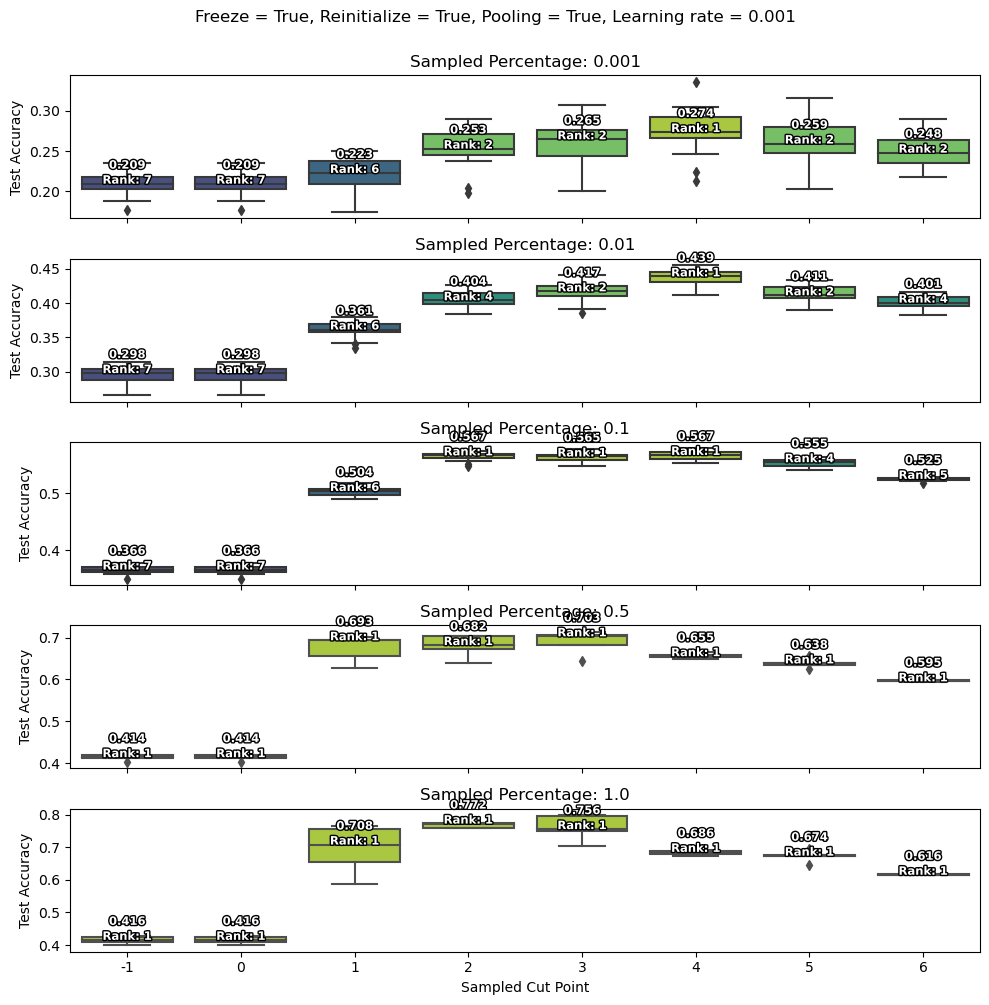

In [99]:
# run statistical tests below to get the df_rankings
df_rankings = pairwise_comparison(df=df)
ranks_sorted = box_plot_percentages_experiments(df=df, rank_df=df_rankings, color_ranks=True, params=params)

In [37]:
# create this dict: rank_color_map = {7: 1, 6:2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7} that maps ranks in range(1,8) to colors in range(0,7)
# in a for loop in dict comprehension
# the the mapping is reverse
# in dict comprehension

ranks_lim = unique_ranks.max()
rank_color_map = {rank: ranks_lim+1-rank for rank in range(ranks_lim, 0, -1)}


<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

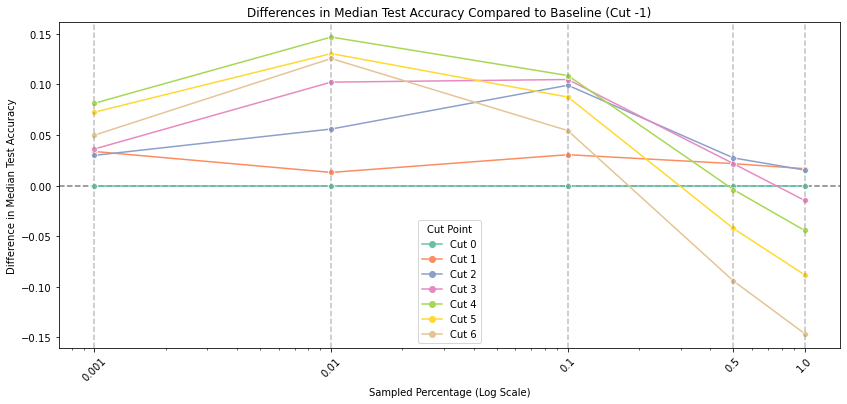

In [9]:
compare_to_baseline_line_plot(df)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

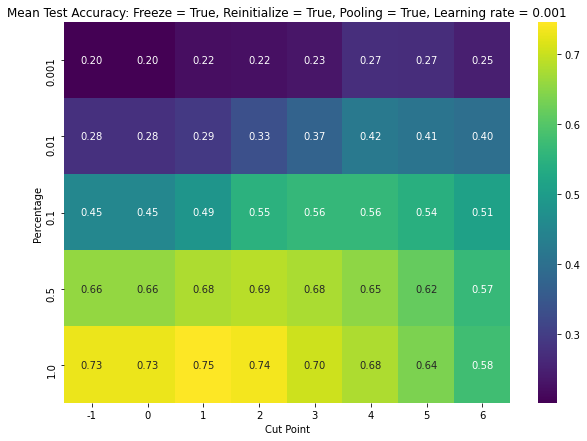

In [10]:
heatmap(df, params, figsize=(10,7))

# 2. Statistical Tests

### Pairwise Comparison between two plots

In [140]:
df_truncated

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.541667,0.178333
1,0.001,0.001,-1,1,0.541667,0.187500
2,0.001,0.001,-1,2,0.625000,0.217333
3,0.001,0.001,-1,3,0.291667,0.186333
4,0.001,0.001,-1,4,0.666667,0.240333
...,...,...,...,...,...,...
635,0.001,1.000,6,0,0.620983,0.617400
636,0.001,1.000,6,1,0.617383,0.613333
637,0.001,1.000,6,2,0.616678,0.613567
638,0.001,1.000,6,3,0.619387,0.615533


In [171]:
# compare all elements of a np array to anothers usign numpy function
np.allclose(np.zeros(5),np.zeros(5))

True

In [172]:
def perform_pairwise_wilcoxon_test(data_1, data_2):
    if np.allclose(data_1, data_2):
        return 0, 1
    # Ensure equal length by trimming or padding
    min_len = min(len(data_1), len(data_2))
    data_1, data_2 = data_1[:min_len], data_2[:min_len]

    stat, p_value = wilcoxon(data_1, data_2)
    return stat, p_value

In [158]:
perform_pairwise_wilcoxon_test(np.zeros(5), np.zeros(5))

(0, 1)

In [173]:
def pairwise_comparison_multiple_plots(df1:pd.DataFrame, df2:pd.DataFrame):
    # Perform pairwise comparison for each sampled_percentage
    wilcoxon_pairwise_results = []

    for percentage in df1['Percentage'].unique():
        df1_perc = df1[df1['Percentage'] == percentage]
        df2_perc = df2[df2['Percentage'] == percentage]
        
        cut_points = df1_perc['Cut Point'].unique()

        for cut in cut_points:
            stat, p_value = perform_pairwise_wilcoxon_test(df1_perc[df1_perc['Cut Point'] == cut]['Test Accuracy'],
                                                        df2_perc[df2_perc['Cut Point'] == cut]['Test Accuracy'])
            wilcoxon_pairwise_results.append({
                'Percentage': percentage,
                'Cut Point': cut,
                'statistic': stat,
                'p_value': p_value
            })

    # Converting the results to a DataFrame
    df_wilcoxon_pairwise = pd.DataFrame(wilcoxon_pairwise_results)

    df_wilcoxon_pairwise['is_significant'] = df_wilcoxon_pairwise['p_value'] < 0.05

    return df_wilcoxon_pairwise

In [174]:
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_truncated)

In [175]:
df_wilcoxon_pairwise

,Percentage,Cut Point,statistic,p_value,is_significant
0,0.001,-1,0.0,1.000000e+00,False
1,0.001,0,81.0,2.747941e-02,True
2,0.001,1,154.0,8.325094e-01,False
3,0.001,2,25.0,5.388260e-05,True
4,0.001,3,19.0,1.829863e-05,True
5,0.001,4,161.0,9.789153e-01,False
6,0.001,5,45.0,9.118915e-04,True
7,0.001,6,72.5,1.355469e-02,True
8,0.010,-1,0.0,1.000000e+00,False
9,0.010,0,34.0,2.169013e-04,True


In [176]:
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_truncated = df_truncated.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_truncated = stats_truncated.reset_index()
stats_truncated.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

Two versions:
1. Color the significantly bigger one and significantly smaller one different colors (first cell below)
2. Only 2 colors: one if significant one not

In [178]:
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_truncated = stats_truncated.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > stats_truncated.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_truncated.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_truncated.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_truncated.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['Mean Test Accuracy'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_truncated['Mean Test Accuracy'] = df_rankings_truncated['Mean Test Accuracy'].astype(int)

In [179]:
# rename the Mean Test Accuracy column of df_rankings_truncated into rank
df_rankings_truncated.rename(columns={'Mean Test Accuracy': 'rank'}, inplace=True)
df_rankings_empirical.rename(columns={'Mean Test Accuracy': 'rank'}, inplace=True)

[(0.34832334141176474, 0.4657111465098039, 0.8883461629411764), (0.48385432959999997, 0.6220498496, 0.9748082026), (0.6193179451882354, 0.7441207347647059, 0.9989309188196078), (0.753610618, 0.830232851, 0.960871157), (0.8674276350862745, 0.864376599772549, 0.8626024620196079), (0.9473454036, 0.7946955048, 0.7169905058), (0.9684997476666667, 0.673977379772549, 0.5566492560470588), (0.9318312966, 0.5190855232, 0.4064796086), (0.8393649370784314, 0.32185622094117644, 0.26492398098039216)]


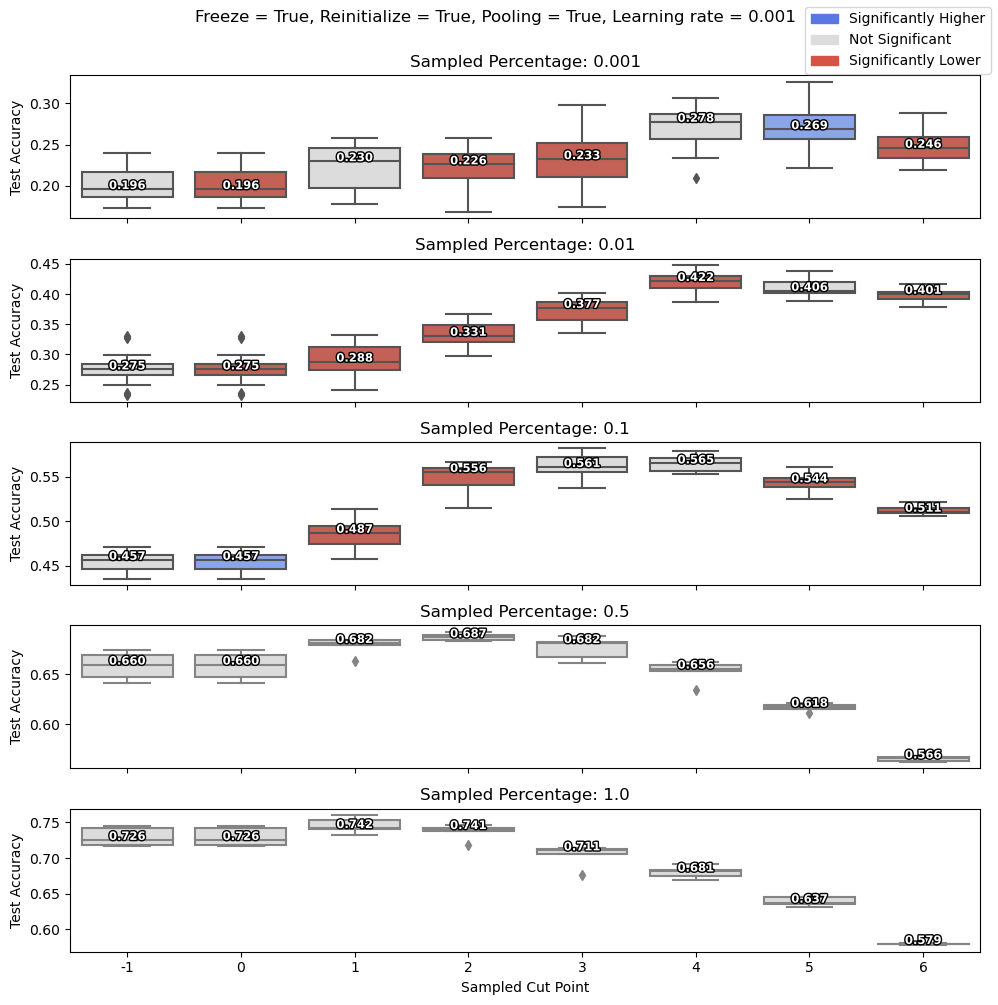

In [180]:
ranks_sorted = box_plot_percentages_experiments(df=df_empirical, rank_df=df_rankings_empirical, pairwise=True, color_palette="coolwarm", add_baseline=False, color_ranks=True, params=params)

[(0.34832334141176474, 0.4657111465098039, 0.8883461629411764), (0.48385432959999997, 0.6220498496, 0.9748082026), (0.6193179451882354, 0.7441207347647059, 0.9989309188196078), (0.753610618, 0.830232851, 0.960871157), (0.8674276350862745, 0.864376599772549, 0.8626024620196079), (0.9473454036, 0.7946955048, 0.7169905058), (0.9684997476666667, 0.673977379772549, 0.5566492560470588), (0.9318312966, 0.5190855232, 0.4064796086), (0.8393649370784314, 0.32185622094117644, 0.26492398098039216)]


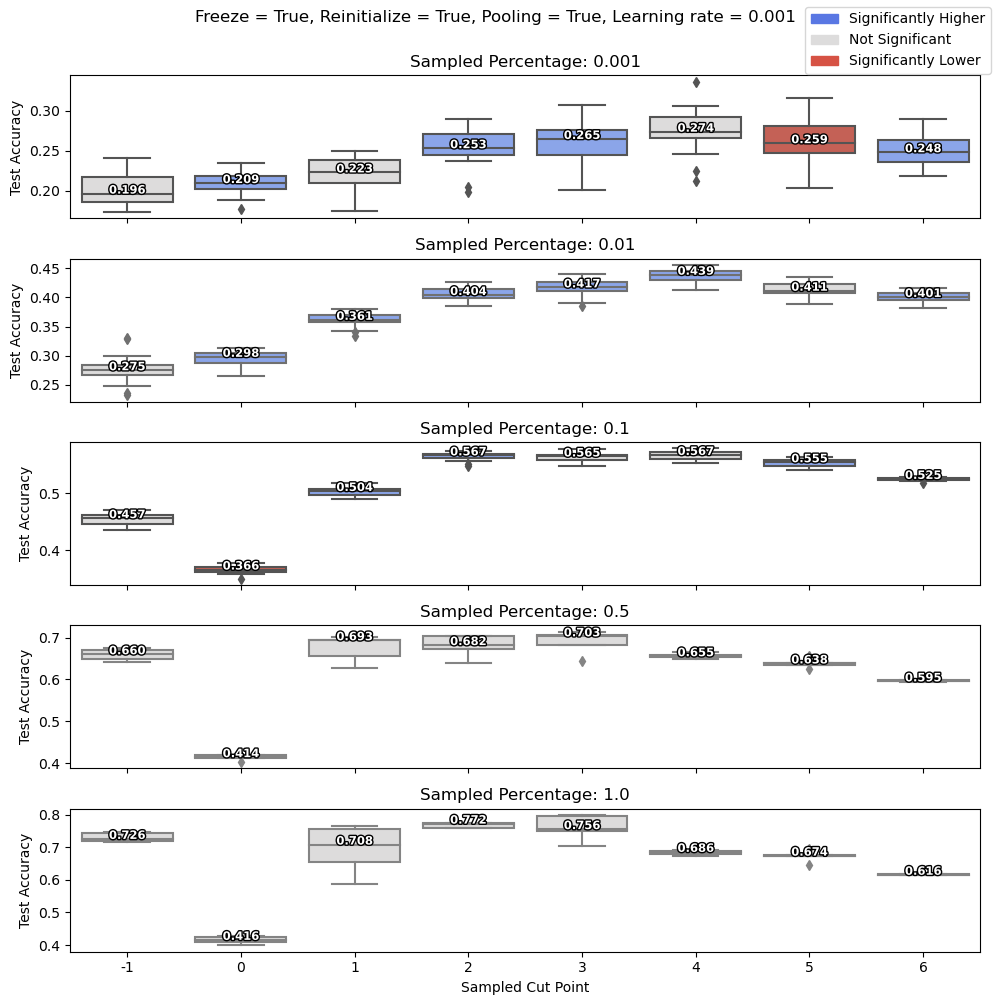

In [182]:
ranks_sorted = box_plot_percentages_experiments(df=df_truncated, rank_df=df_rankings_truncated, pairwise=True, color_palette="coolwarm", add_baseline=False, color_ranks=True, params=params)